## Configurações

In [62]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif

## Entendendo os dados

In [3]:
df = pd.read_csv('../data/input/creditcard.csv')

In [4]:
df.shape

(284807, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df["Class"].unique()

array([0, 1])

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Resumo
* O dataset contém +284k linhas e 31 colunas
* Não existem entradas com valores nulos
* Todas as colunas tem formato float, menos Class, que tem valores 0 e 1

## Visualizações

In [12]:
features = df.columns[:-1]
target = df.columns[-1]

print(f'Features: {features}')
print(f'Target: {target}')

Features: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Target: Class


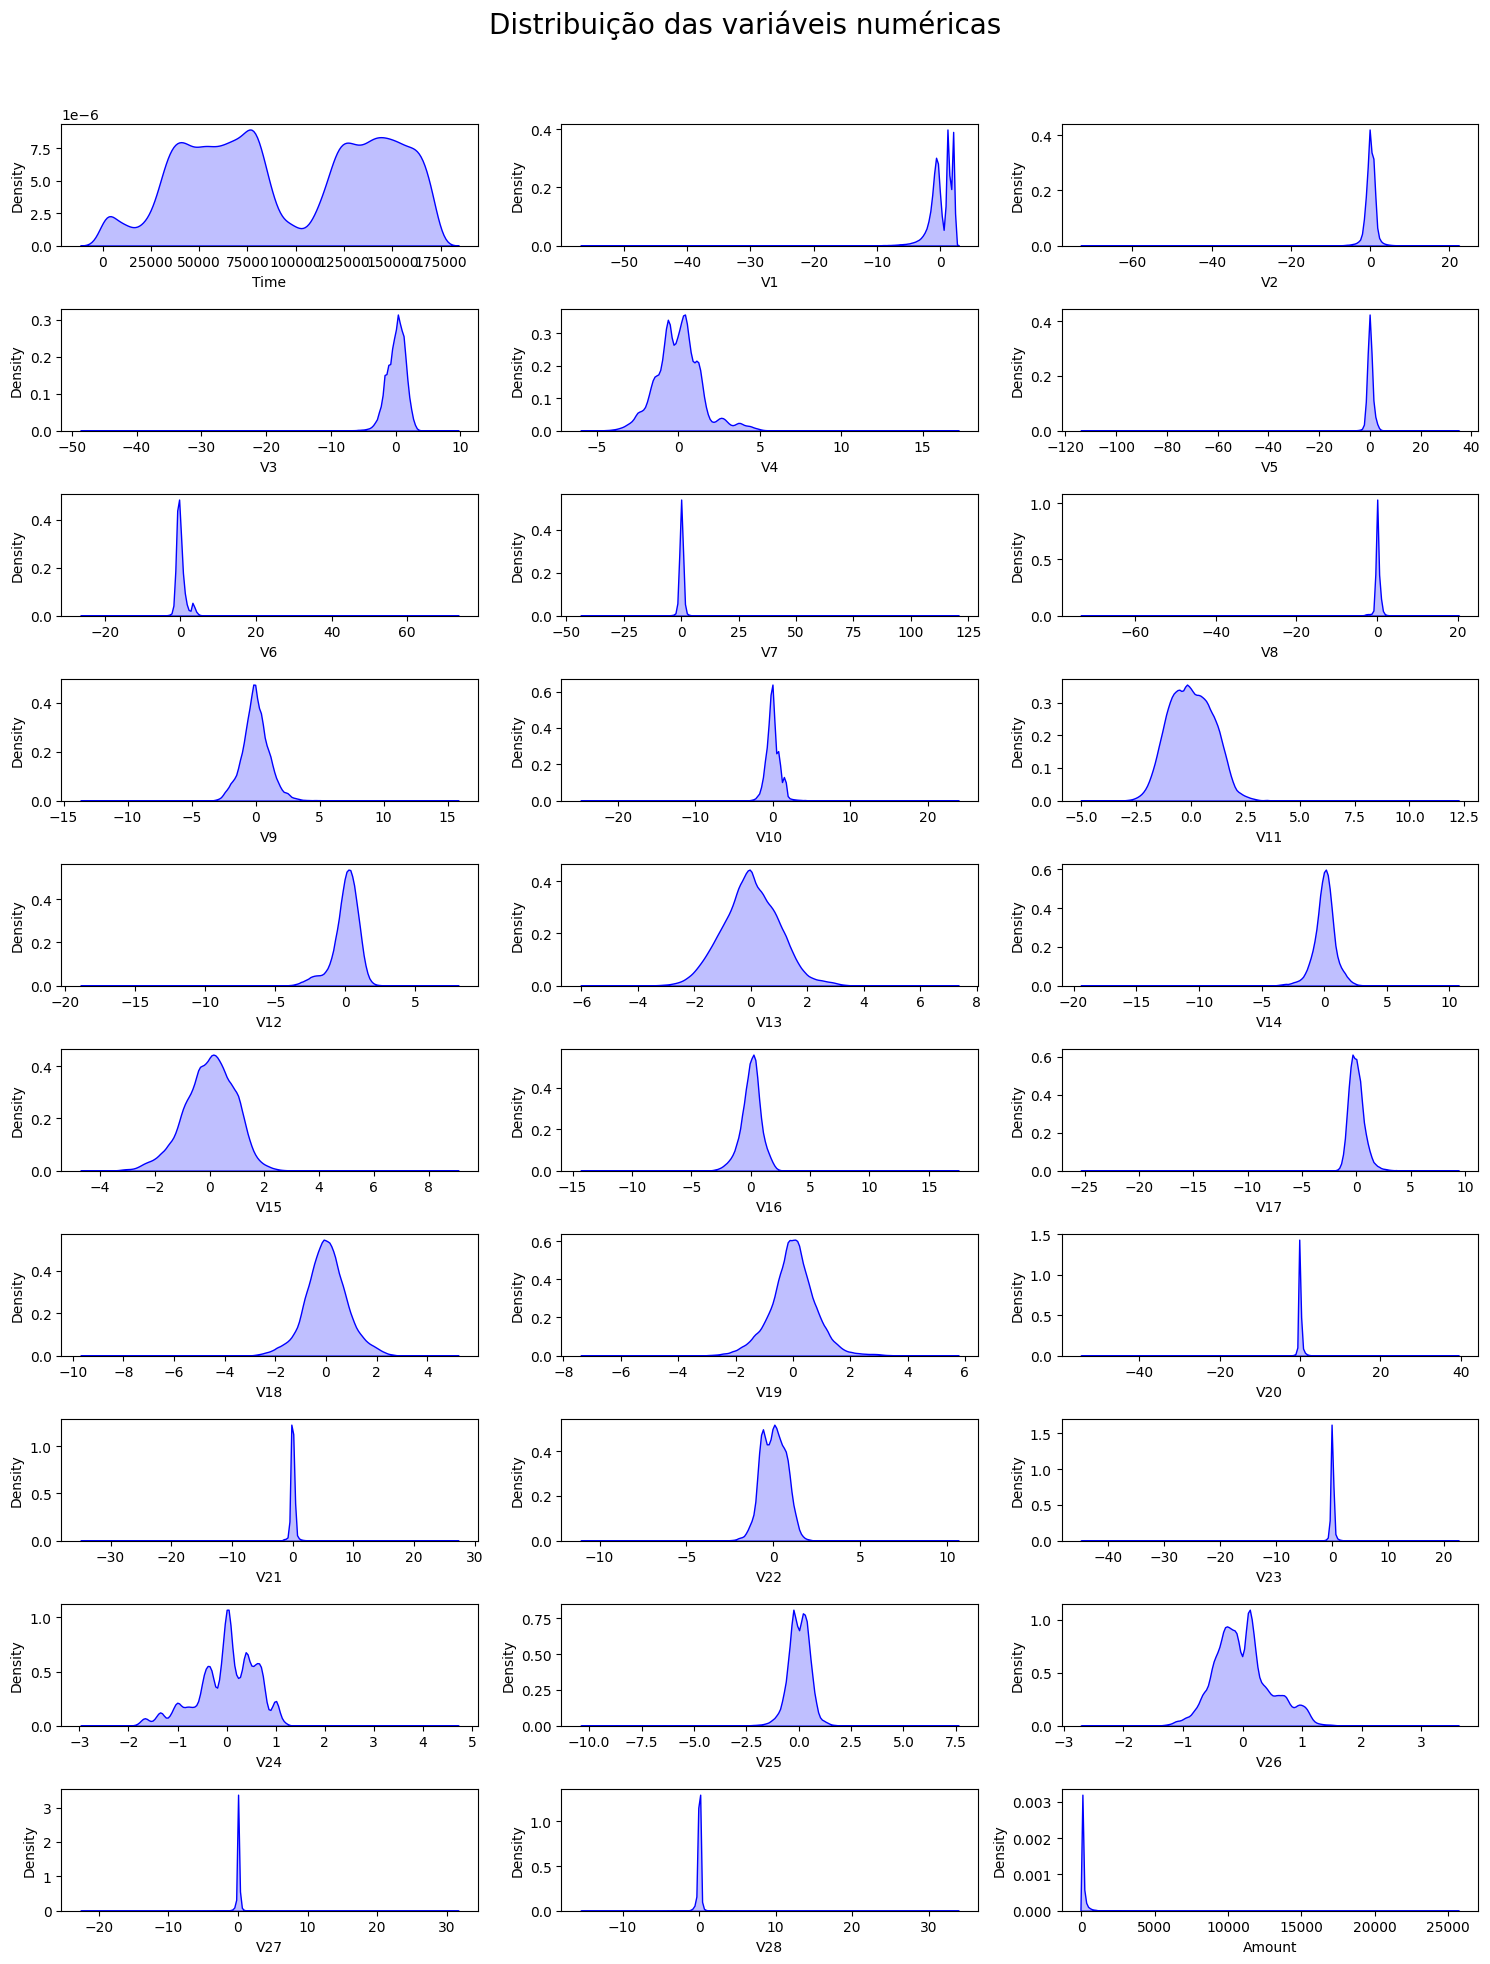

In [13]:
plt.figure(figsize=(15, 20)) 

plt.suptitle('Distribuição das variáveis numéricas', fontsize=20) 

n_cols = 3 
n_rows = (len(features) + n_cols - 1) // n_cols 

for i in range(len(features)): 
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(x=df[features[i]], fill=True, color='b') 
    plt.xlabel(features[i]) 
    plt.tight_layout(rect=[0, 0, 1, 0.96])

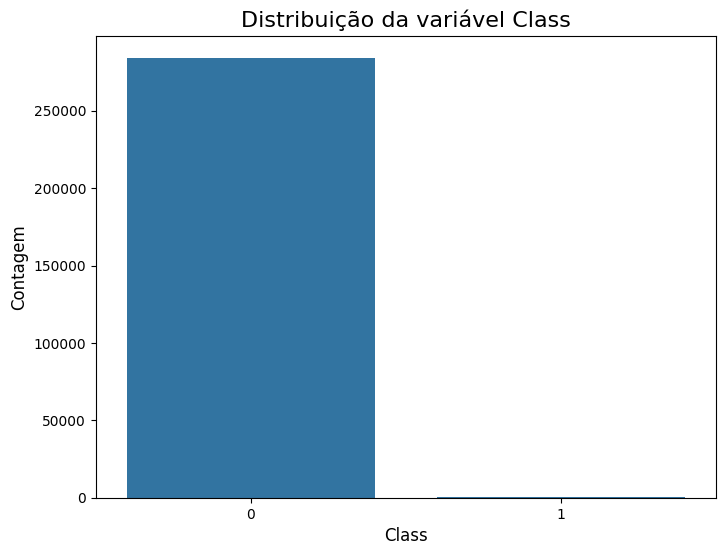

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x=df[target])
plt.title(f'Distribuição da variável {target}', fontsize=16)
plt.xlabel(target, fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()

In [15]:
df[target].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [18]:
df[target].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

### Resumo
* O dataset é extremamente desbalanceado (99.83% vs 0.17%)

## Pré-processamento de dados

In [20]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(1081)

In [23]:
df = df.drop_duplicates()

In [24]:
df.shape

(283726, 31)

## Relações entre variáveis

### Correlação

#### Variável x Variável

In [27]:
corr_matrix = df[features].corr()

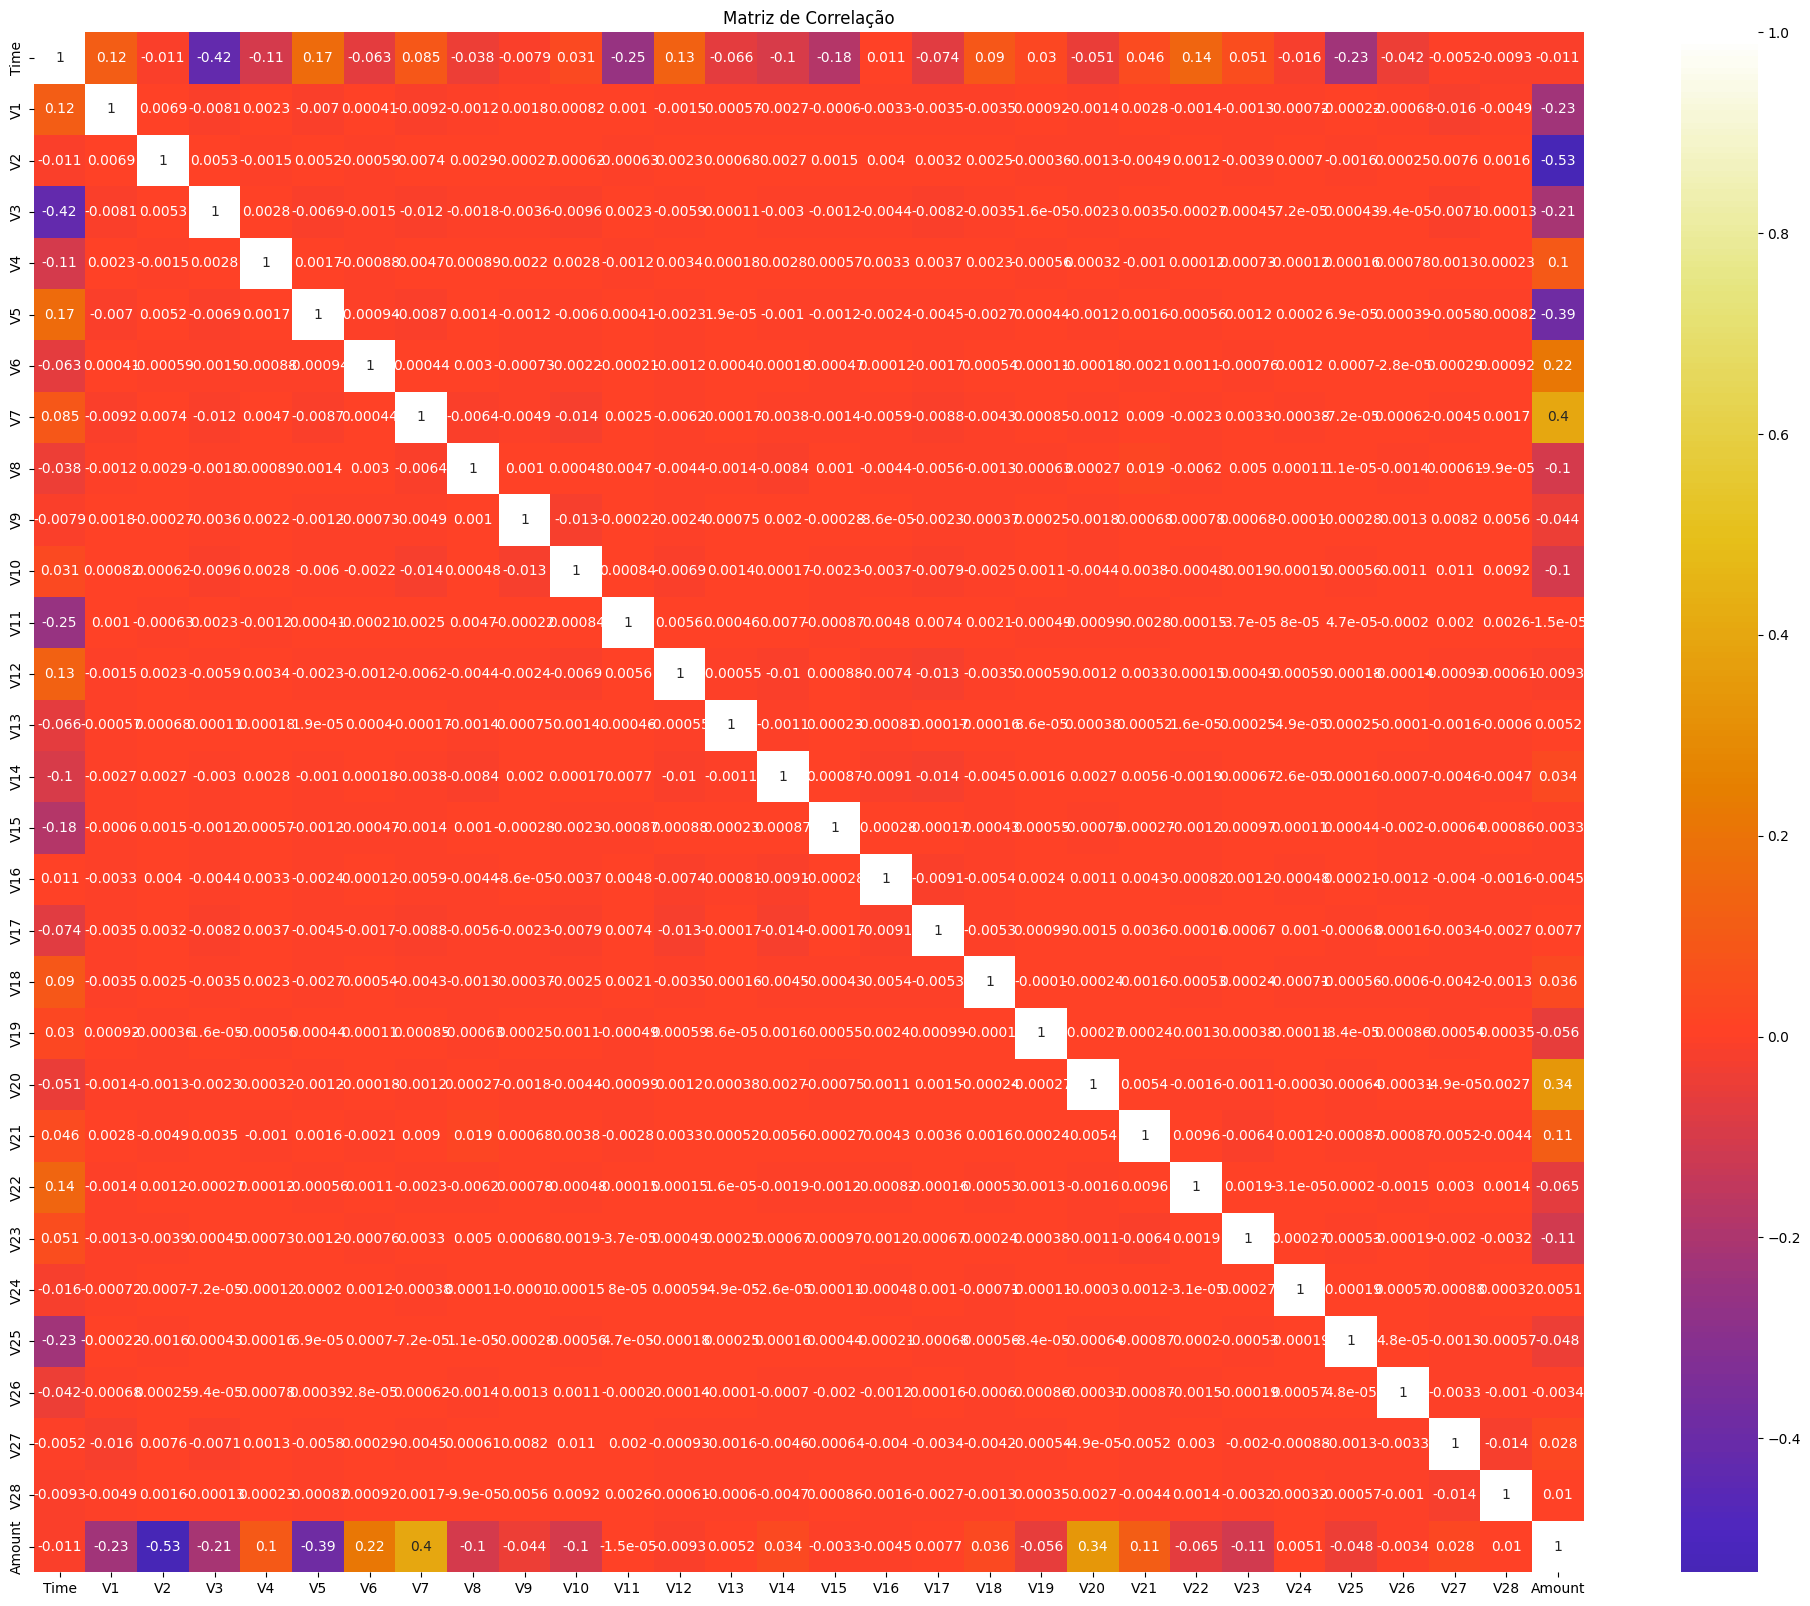

In [32]:
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix, cmap="CMRmap", center=0, annot=True)
plt.title("Matriz de Correlação")
plt.show()

#### Variável x Target

In [47]:
corr_matrix_total = df.corr()

In [48]:
corr_target = corr_matrix_total[target].sort_values(ascending=False)

In [49]:
corr_target

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

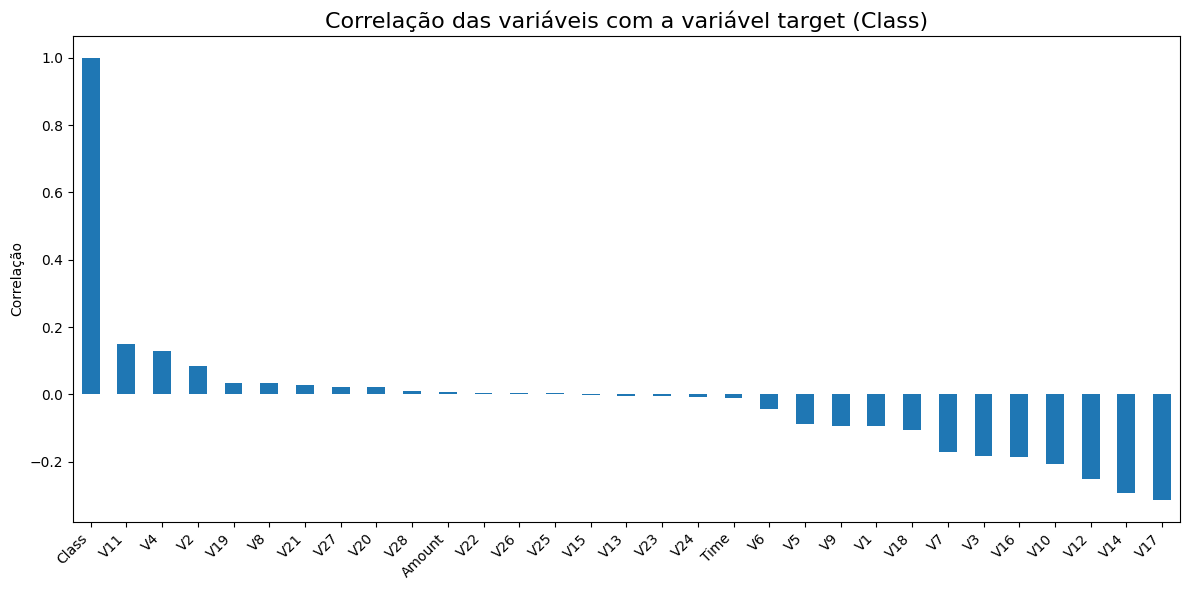

In [54]:
plt.figure(figsize=(12,6))
corr_target.plot(kind="bar")
plt.title("Correlação das variáveis com a variável target (Class)", fontsize=16)
plt.ylabel("Correlação")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Informação Mútua

In [57]:
X = df.drop('Class', axis=1)
y = df['Class']

In [58]:
mi = mutual_info_classif(X, y, random_state=42)

In [59]:
mi_scores = pd.Series(mi, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [60]:
mi_scores

V17       0.007873
V14       0.007746
V12       0.007220
V10       0.007150
V11       0.006450
V16       0.005752
V4        0.004587
V3        0.004583
V18       0.003875
V9        0.003854
V7        0.003630
V2        0.002920
V27       0.002166
V21       0.002139
V5        0.002065
V6        0.002000
V1        0.001851
V28       0.001607
V8        0.001600
Amount    0.001369
Time      0.001354
V19       0.001132
V20       0.000904
V23       0.000471
V24       0.000364
V25       0.000251
V26       0.000239
V22       0.000126
V13       0.000085
V15       0.000023
dtype: float64

<Axes: title={'center': 'Mutual Information'}>

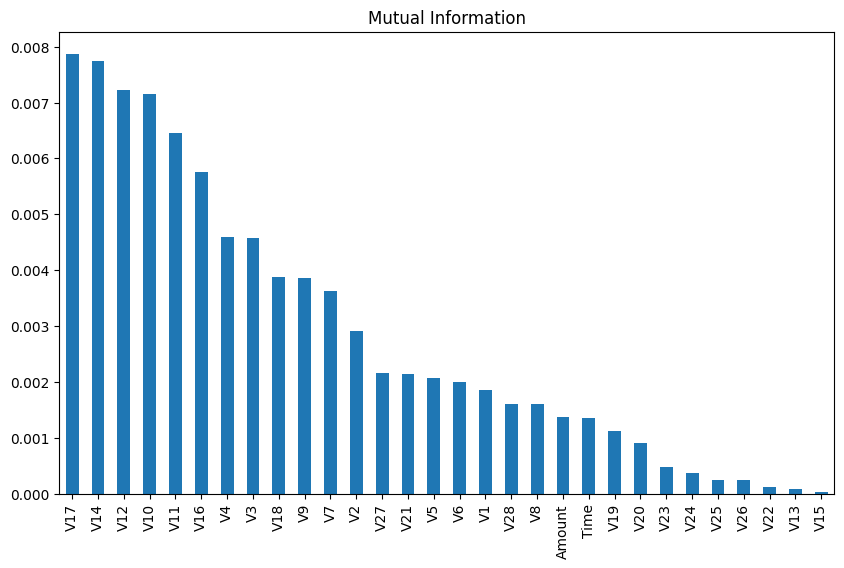

In [61]:
mi_scores.plot(kind='bar', figsize=(10,6), title="Mutual Information")

### Resumo
* Não foi identificado nenhum padrão anormal nas correlações e informações mútuas analisadas, então todas as variáveis serão selecionadas para o modelo

## Exportando os dados limpos

In [63]:
df.to_csv("../data/input/creditcard_clean.csv", index=False)